In [94]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as kNearestNeighbors
from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
from sklearn import svm 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('candidate_train.csv')
test_data = pd.read_csv('candidate_val.csv')
label = pd.read_csv('train_answer.csv')
print(train_data.shape)
print(test_data.shape)
print(label.shape)

(79267, 3178)
(26358, 3178)
(79267, 7)


### 1. 按照ID排序

In [6]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3168,3169,3170,3171,3172,3173,3174,3175,3176,id
0,0,0,0,0,0,0,0,0,4,0,...,639.301885,674.304907,2.427349,129.159,-0.8904,3,2,51.40,2,c8834c14
1,0,0,0,0,0,0,0,0,2,0,...,253.707942,345.257130,1.801976,124.143,-1.3584,3,2,60.95,0,c4758613
2,0,0,0,0,0,0,0,0,1,1,...,389.501935,427.557546,1.989185,121.139,-0.8106,2,1,23.24,0,8e4b1d9a
3,0,0,0,0,0,0,1,0,2,0,...,264.569528,398.755261,1.921451,126.155,0.3463,2,1,37.30,0,ab4ec102
4,0,0,0,0,0,0,0,0,1,0,...,472.605173,552.977010,2.132529,127.099,-0.1910,4,1,55.40,1,dd1317ea


In [12]:
Train = pd.merge(train_data,label,on='id')

In [14]:
label.head()

,id,p1,p2,p3,p4,p5,p6
0,45ec2bbe,1.6866,-0.2340,0.0777,0.184867,-387.077548,-387.069843
1,530775c3,1.2997,-0.2518,0.0232,0.170199,-440.300227,-440.290746
2,4ca38b2c,3.6442,-0.2436,-0.0062,0.137677,-380.868636,-380.860872
3,630fe593,6.7048,-0.2374,0.0374,0.172693,-440.302592,-440.293710
4,b4812aaf,1.4201,-0.1824,0.0389,0.135641,-455.179317,-455.169936


In [15]:
label[label['id'].isin(['c8834c14'])]

,id,p1,p2,p3,p4,p5,p6
18990,c8834c14,1.1804,-0.2437,0.0576,0.170321,-440.223611,-440.214222


In [13]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,...,3174,3175,3176,id,p1,p2,p3,p4,p5,p6
0,0,0,0,0,0,0,0,0,4,0,...,2,51.40,2,c8834c14,1.1804,-0.2437,0.0576,0.170321,-440.223611,-440.214222
1,0,0,0,0,0,0,0,0,2,0,...,2,60.95,0,c4758613,3.1103,-0.2424,-0.0294,0.138296,-417.984094,-417.976838
2,0,0,0,0,0,0,0,0,1,1,...,1,23.24,0,8e4b1d9a,1.2346,-0.2479,0.0159,0.123959,-400.647248,-400.639696
3,0,0,0,0,0,0,1,0,2,0,...,1,37.30,0,ab4ec102,3.2361,-0.2341,-0.0176,0.157146,-423.022821,-423.013580
4,0,0,0,0,0,0,0,0,1,0,...,1,55.40,1,dd1317ea,3.8822,-0.2524,-0.0655,0.102003,-473.888949,-473.881271


In [25]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3168,3169,3170,3171,3172,3173,3174,3175,3176,id
0,0,0,0,0,0,0,1,0,0,0,...,266.664496,344.876756,1.786485,112.092,-1.42970,5,0,60.67,0,66b19220
1,0,0,0,0,0,0,0,0,3,0,...,423.242443,435.415219,2.029533,123.155,0.59510,2,1,29.10,0,bed4af38
2,0,0,0,0,0,0,1,0,1,0,...,240.376174,346.247541,1.829334,113.120,-0.39458,4,2,61.80,1,96f5658c
3,0,0,0,0,0,0,3,0,1,0,...,438.281302,513.076246,2.230665,118.176,0.79220,2,1,29.46,3,d7031639
4,0,0,0,0,0,0,1,0,5,0,...,333.248296,473.313759,2.143609,123.199,2.48038,1,0,23.79,2,1fdd8f3c


### 2. 分割数据

In [63]:
X_train = Train.iloc[:,:3177]
y_train = Train.iloc[:,3178:3184]
X_test = test_data.iloc[:,:3177]

In [142]:
seed = 10
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3, random_state=seed)

# ans = pd.DataFrame(ans)
# train_x = pd.DataFrame(train_x)
# valid_x = pd.DataFrame(valid_x)
# train_y = pd.DataFrame(train_y)
# valid_y = pd.DataFrame(valid_y)

# train_x.to_csv("train_feature.csv")
# valid_x.to_csv("valid_feature.csv")
# train_y.to_csv("train_label.csv")
# valid_y.to_csv("valid_label.csv")

# ax1 = sns.distplot(ans.iloc[:, 2])
# ax2 = sns.distplot(train_y.iloc[:, 2])

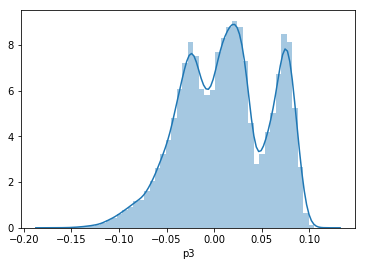

In [143]:
ax = sns.distplot(y_train.iloc[:,2])

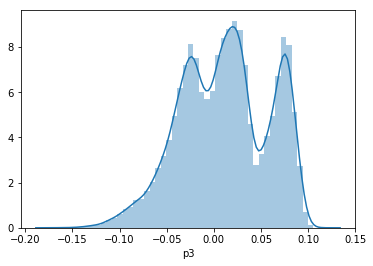

In [144]:
ax = sns.distplot(train_y.iloc[:,2])

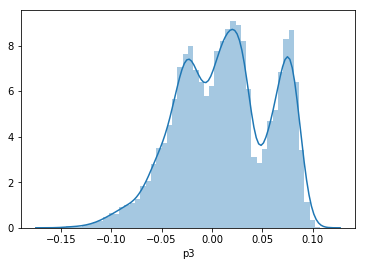

In [145]:
ax = sns.distplot(valid_y.iloc[:,2])

In [113]:
print(y_train.shape)
print(train_y.shape)
print(valid_y.shape)

(79267, 6)
(55486, 6)
(23781, 6)


##### 数据分桶

In [124]:
y = y_train.iloc[:,2].values
group=pd.cut(y,20,right=False)#分组区间,长度20
counts=group.value_counts()#series,区间-个数
freq_1 = list(counts/counts.sum())

In [125]:
y = train_y.iloc[:,2].values
group=pd.cut(y,20,right=False)#分组区间,长度20
counts=group.value_counts()#series,区间-个数
freq_2 = list(counts/counts.sum())

In [126]:
y = valid_y.iloc[:,2].values
group=pd.cut(y,20,right=False)#分组区间,长度20
counts=group.value_counts()#series,区间-个数
freq_3 = list(counts/counts.sum())

In [148]:
def kl_div(dis1, dis2):
    assert (len(dis1) == len(dis2))
    dis1 = np.array(dis1) + 1e-8
    dis2 = np.array(dis2) + 1e-8
    kl = 0
    for i in range(len(dis1)):
        kl += dis1[i] * np.log(dis1[i] / dis2[i])
    return kl


def js_div(dis1, dis2):
    assert (len(dis1) == len(dis2))
    dis1 = np.array(dis1)
    dis2 = np.array(dis2)
    mid = (dis1 + dis2) / 2
    return 0.5 * kl_div(dis1, mid) + 0.5 * kl_div(dis2, mid)


print(kl_div([0.2, 0.2, 0.2, 0.2, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]))
print(js_div(np.array([0.2, 0.2, 0.2, 0.2, 0.2]), np.array([0.2, 0.2, 0.2, 0.2, 0.2])))

0.33479527012076654
0.0


In [132]:
l1 = kl_div(freq_1, freq_2)
l2 = kl_div(freq_1, freq_3)
l3 = kl_div(freq_2, freq_2)
l = (l1+l2+l3)/3
print(l)

0.012394330315237777


In [133]:
l1 = js_div(freq_1, freq_2)
l2 = js_div(freq_1, freq_3)
l3 = js_div(freq_2, freq_2)
l = (l1+l2+l3)/3
print(l)

0.0034722839265971736


##### 找最好的 seed 使得 l 最小

In [146]:
y = y_train.iloc[:,2].values
group=pd.cut(y,500,right=False)#分组区间,长度20
counts=group.value_counts()#series,区间-个数
freq_1 = list(counts/counts.sum())

In [147]:
dic = {}
for seed in range(50):
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3, random_state=seed)
    y = train_y.iloc[:,2].values
    group=pd.cut(y,500,right=False)#分组区间,长度20
    counts=group.value_counts()#series,区间-个数
    freq_2 = list(counts/counts.sum())
    
    y = valid_y.iloc[:,2].values
    group=pd.cut(y,500,right=False)#分组区间,长度20
    counts=group.value_counts()#series,区间-个数
    freq_3 = list(counts/counts.sum())
    
    l1 = kl_div(freq_1, freq_2)
    l2 = kl_div(freq_1, freq_3)
    l3 = kl_div(freq_2, freq_2)
    l = (l1+l2+l3)/3
    dic[seed] = l

In [140]:
seed_and_l=sorted(dic.items(),key=lambda x:x[1])

In [149]:
seed_and_l

[(10, 0.009727756175352452),
 (38, 0.010304754456527464),
 (12, 0.011217848265760893),
 (6, 0.011775455126363845),
 (14, 0.011908982267531563),
 (3, 0.012040163677053245),
 (9, 0.01213720281132945),
 (31, 0.012235618719792249),
 (16, 0.01229410912074362),
 (1, 0.012394330315237777),
 (17, 0.012470542187328565),
 (18, 0.012619391926151765),
 (40, 0.012624242648864336),
 (42, 0.012816562629310017),
 (49, 0.012827403193730798),
 (41, 0.012879556291089465),
 (2, 0.01307761790173588),
 (21, 0.013230966209380884),
 (27, 0.013328220703499845),
 (26, 0.013819054289890826),
 (28, 0.014115776993638482),
 (19, 0.014554132433707628),
 (44, 0.014586309084398695),
 (24, 0.01481958669692475),
 (7, 0.014892369369666897),
 (45, 0.015621534417844139),
 (34, 0.01586351137249909),
 (33, 0.015885408803432477),
 (47, 0.016124330233837487),
 (20, 0.016329378085666844),
 (4, 0.016419301761965096),
 (15, 0.016435912708138694),
 (11, 0.01666898229818321),
 (48, 0.01707627233896708),
 (30, 0.017740061271324464),

### 3. 数据分析

##### 观察缺失值

In [65]:
# 没有缺失值
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/Train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


,Total,Percent
0,0.0,0.0
1,0.0,0.0
10,0.0,0.0
100,0.0,0.0
1000,0.0,0.0
1001,0.0,0.0
1002,0.0,0.0
1003,0.0,0.0
1004,0.0,0.0
1005,0.0,0.0


##### 去掉只含一个列的

In [71]:
# 去掉只有一个值的列
One_value_array = []
for i in range(3177):
    if len(X_train.iloc[:, i].value_counts()) == 1:
        One_value_array.append(str(i))

In [69]:
print(len(One_value_array))

51


In [75]:
X_train = X_train.drop(columns=One_value_array)
X_test = X_test.drop(columns=One_value_array)

In [76]:
X_train.shape

(79267, 3126)

In [78]:
y_train.iloc[:,0]

0        1.1804
1        3.1103
2        1.2346
3        3.2361
4        3.8822
5        0.5007
6        1.6193
7        1.7552
8        0.8247
9        4.9949
10       2.3677
11       3.2970
12       4.2966
13       2.7024
14       1.1661
15       2.3963
16       1.4563
17       1.3079
18       2.1820
19       1.4837
20       1.3578
21       3.4309
22       3.6949
23       1.6364
24       2.5846
25       5.0679
26       2.1034
27       1.8728
28       2.4264
29       2.2328
          ...  
79237    0.7548
79238    4.0967
79239    1.4995
79240    5.7041
79241    1.5677
79242    1.4302
79243    6.1016
79244    2.5384
79245    1.6304
79246    3.2001
79247    4.4021
79248    4.4805
79249    1.2869
79250    2.3162
79251    3.9318
79252    1.6345
79253    0.2476
79254    1.1667
79255    4.9468
79256    4.2706
79257    5.5479
79258    1.0954
79259    1.3268
79260    1.4273
79261    2.0163
79262    3.1142
79263    3.0037
79264    0.9196
79265    3.8351
79266    3.6018
Name: p1, Length: 79267,

##### label分布

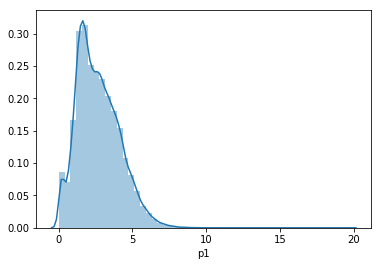

In [85]:
ax = sns.distplot(y_train.iloc[:,0])

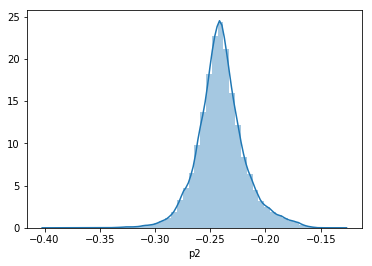

In [86]:
ax = sns.distplot(y_train.iloc[:,1])

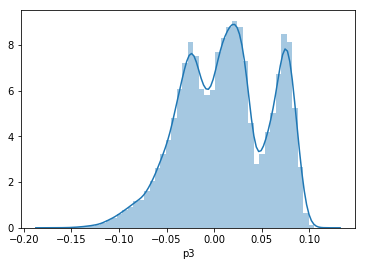

In [87]:
ax = sns.distplot(y_train.iloc[:,2])

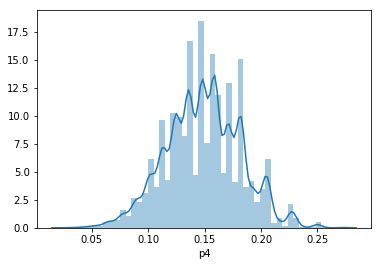

In [88]:
ax = sns.distplot(y_train.iloc[:,3])

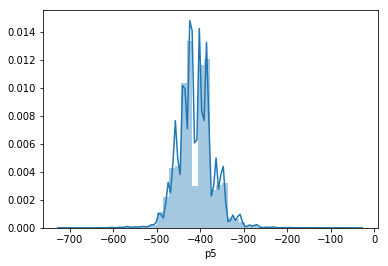

In [89]:
ax = sns.distplot(y_train.iloc[:,4])

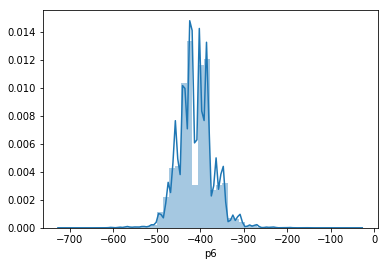

In [90]:
ax = sns.distplot(y_train.iloc[:,5])

##### 丢掉分布不一致的列